In [2]:
import numpy as np, matplotlib.pyplot as plt
from Reg_class import Polyfit, train_test_split, FrankeFunction, DesignMatrix

n = 70
pmax = 30
k = 5
x = np.sort(np.random.rand(n))
y = np.sort(np.random.rand(n))

x, y = np.meshgrid(x, y)

noise = 0.2*np.random.randn(n, n)

z = FrankeFunction(x, y) + noise


x, y, z = x.reshape(n**2, 1), y.reshape(n**2, 1), z.reshape(n**2, 1)



In [3]:
from sklearn.model_selection import KFold
from Reg_class import Polyfit


p = np.arange(1,pmax+1)

kfold = KFold(n_splits = k,shuffle=True,random_state=5)


err = np.empty(pmax)
bias = np.empty(pmax)
var = np.empty(pmax)
reg = Polyfit()

for i in range(pmax):
    zpred = np.empty((int(n**2/k), k))
    j=0

    for train_ind,test_ind in kfold.split(x):
        Xtrain = DesignMatrix(x[train_ind], y[train_ind], p[i])
        reg.fit(Xtrain, z[train_ind], 'OLS')
        Xtest = DesignMatrix(x[test_ind], y[test_ind], p[i])
        ztest = z[test_ind]
        zpred[:,j] = reg.predict(Xtest).ravel()
        j+=1
    
    err[i] = np.mean( np.mean((ztest - zpred)**2, axis=1, keepdims=True) )
    bias[i] = np.mean( (ztest - np.mean(zpred, axis=1, keepdims=True))**2 )
    var[i] = np.mean( np.var(zpred, axis=1, keepdims=True) )





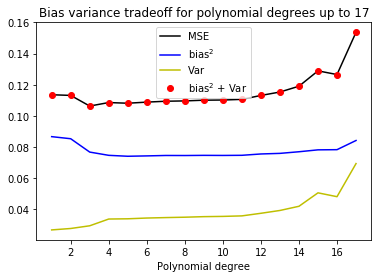

In [24]:
plt.figure()
pstop = 17
plt.plot(p[:pstop],err[:pstop],'k',label='MSE')
plt.plot(p[:pstop],bias[:pstop],'b',label=r'bias$^2$')
plt.plot(p[:pstop],var[:pstop],'y',label='Var')

plt.plot(p[:pstop],var[:pstop] + bias[:pstop] ,'ro',label=r'bias$^2$ + Var')

plt.xlabel('Polynomial degree')
plt.title('Bias variance tradeoff for polynomial degrees up to 17')
plt.legend()
plt.savefig('bvt17.pdf')
plt.show()
